<a href="https://colab.research.google.com/github/NestorCervantes/Pruebas2.0/blob/main/Pia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PIA: Entrenamiento de una red neuronal convolucional
# Nombre de los alumnos:
# Matrículas:
# Hora: N4

In [2]:
# PASO 1. Ingresar librerías

import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models # conjunto de datos
import matplotlib.pyplot as plt # graficar
import numpy as np

In [3]:
# Paso 2. Cargar datos

# Preparación de kaggle en colab

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

Saving kaggle.json to kaggle.json


In [4]:
# Ingreso de datos

!kaggle datasets download -d datamunge/sign-language-mnist

# Descompresión del archivo

!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 53% 33.0M/62.6M [00:00<00:00, 72.1MB/s]
100% 62.6M/62.6M [00:00<00:00, 112MB/s] 
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [5]:
# Cargar los archivos CSV en DataFrames

train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

# Separar las características (imágenes) y las etiquetas

train_labels = train_data['label'].values
train_images = train_data.drop(columns=['label']).values

test_labels = test_data['label'].values
test_images = test_data.drop(columns=['label']).values

# Mostrar la cantidad de imágenes de entrenamiento y prueba

print("Número de imágenes de entrenamiento:", len(train_images))
print("Número de imágenes de prueba:", len(test_images))

Número de imágenes de entrenamiento: 27455
Número de imágenes de prueba: 7172


In [6]:
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las imágenes de prueba:", test_images.shape)

Forma de las imágenes de entrenamiento: (27455, 784)
Forma de las imágenes de prueba: (7172, 784)


In [7]:
# En este caso, las imágenes están en formato 1D, por lo que debemos convertirlas a 2D (28x28)

train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las imágenes de prueba:", test_images.shape)

Forma de las imágenes de entrenamiento: (27455, 28, 28)
Forma de las imágenes de prueba: (7172, 28, 28)


In [8]:
# PASO 3. Preprocesamiento de datos

# Normalización

train_images, test_images = train_images / 255.0, test_images / 255.0

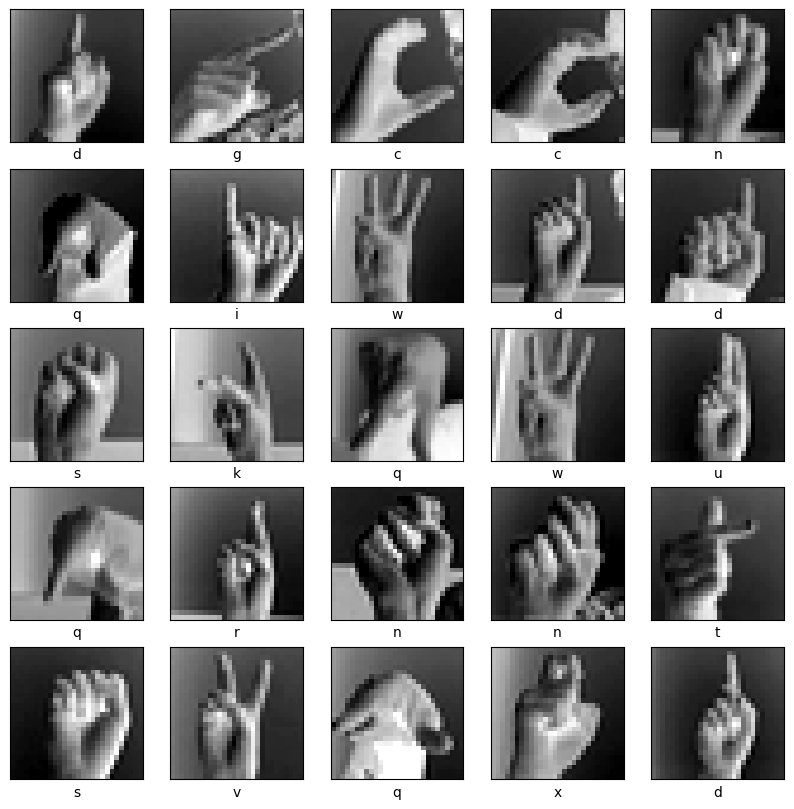

In [9]:
# Verificación

class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
# PASO 4. Selección y entrenamiento del modelo

# Selección y creación del modelo

model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(86, (3, 3), activation='relu'))

# Capas de salida

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [19]:
# Entrenamiento

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
858/858 [==============================] - 18s 19ms/step - loss: 2.0235 - accuracy: 0.3598 - val_loss: 1.3651 - val_accuracy: 0.5382
Epoch 2/20
858/858 [==============================] - 16s 19ms/step - loss: 0.7872 - accuracy: 0.7353 - val_loss: 1.1398 - val_accuracy: 0.6557
Epoch 3/20
858/858 [==============================] - 16s 19ms/step - loss: 0.3550 - accuracy: 0.8816 - val_loss: 1.0129 - val_accuracy: 0.7192
Epoch 4/20
858/858 [==============================] - 17s 20ms/step - loss: 0.1626 - accuracy: 0.9490 - val_loss: 1.2293 - val_accuracy: 0.7156
Epoch 5/20
858/858 [==============================] - 17s 20ms/step - loss: 0.0961 - accuracy: 0.9715 - val_loss: 1.2463 - val_accuracy: 0.7273
Epoch 6/20
858/858 [==============================] - 16s 19ms/step - loss: 0.0595 - accuracy: 0.9831 - val_loss: 1.3940 - val_accuracy: 0.7351
Epoch 7/20
858/858 [==============================] - 17s 19ms/step - loss: 0.0488 - accuracy: 0.9866 - val_loss: 1.7044 - val_accuracy:

225/225 - 1s - loss: 2.2215 - accuracy: 0.7223 - 1s/epoch - 5ms/step


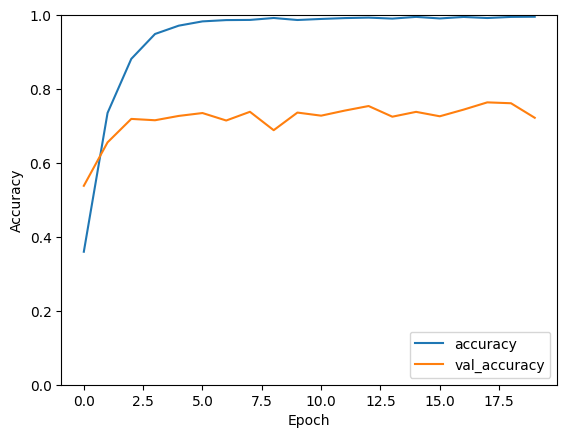

In [20]:
# Evaluación

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
# Paso 5. Predicción / Prueba

predictions = model.predict(test_images)

predictions[0]

225/225 [==============================] - 1s 5ms/step


array([6.7379887e-34, 1.3430413e-14, 3.9285930e-15, 5.7603270e-16,
       3.7260175e-17, 7.9179141e-10, 9.9995714e-01, 8.3907295e-08,
       3.9759354e-14, 7.0844777e-18, 7.4550685e-13, 1.1169294e-15,
       3.7801343e-17, 6.9911924e-16, 8.6414857e-09, 6.1342648e-10,
       1.5050406e-12, 3.0134211e-15, 2.7376330e-09, 1.3476567e-08,
       5.9161983e-22, 1.3652743e-10, 4.2690470e-05, 1.1918775e-09,
       2.8553332e-17, 3.2166456e-20], dtype=float32)

In [22]:
np.argmax(predictions[0])

6

In [23]:
test_labels[0]

6

IndexError: index 1012 is out of bounds for axis 0 with size 5

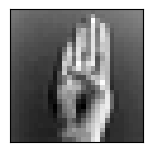

In [31]:
import random

# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(predictions, axis=1)

# Seleccionar 5 índices aleatorios para mostrar predicciones
random_indices = random.sample(range(len(test_images)), 5)

# Visualizar las imágenes junto con sus predicciones y etiquetas reales
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 2, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicción: {class_names[predicted_labels[idx]]}\nReal: {class_names[test_labels[idx]]}")

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 64ms/step


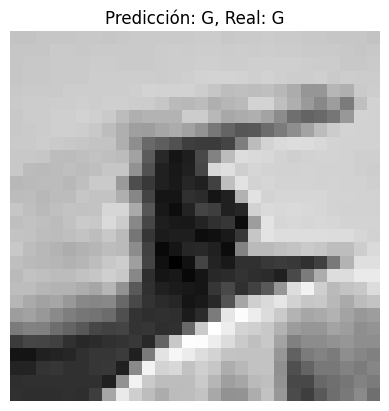

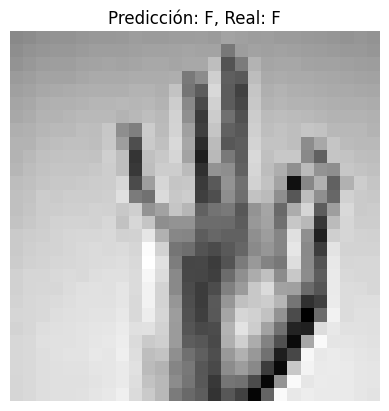

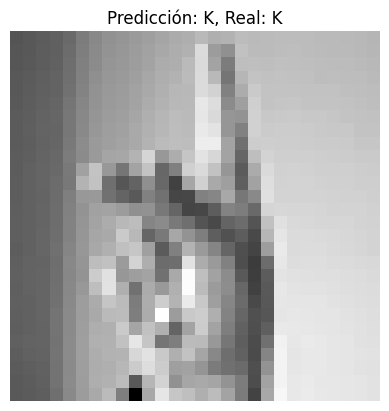

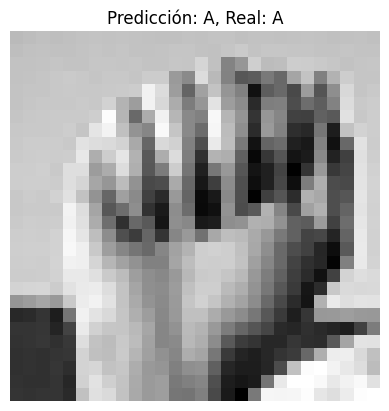

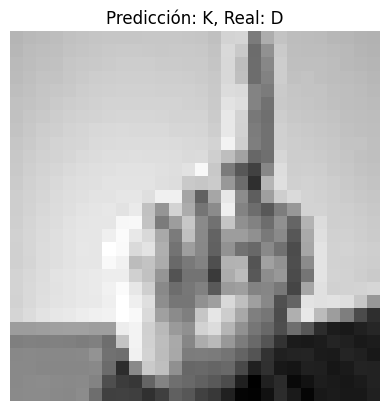

In [33]:
# Realizar predicciones para las primeras 5 imágenes
predictions = model.predict(test_images[:5])

# Letras correspondientes a las etiquetas
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Mostrar las predicciones junto con las imágenes y las etiquetas reales
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')

    # Obtener la etiqueta predicha y la real
    predicted_label = np.argmax(predictions[i])
    predicted_letter = letters[predicted_label]
    real_label = test_labels[i]
    real_letter = letters[real_label]

    # Mostrar la predicción y la etiqueta real como título de la imagen
    plt.title(f'Predicción: {predicted_letter}, Real: {real_letter}')
    plt.axis('off')
    plt.show()